In [1]:
# import libraries
import pandas as pd
import requests
import io
# import emoji
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# from emoji import UNICODE_EMOJI

# download nltk corpus (first time only)
# import nltk

# nltk.download('all')

url = 'https://drive.google.com/file/d/1smkz9GuOqvJQ2m5iRoOyWURkzisU2qiS/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'

# Bypass SSL certificate verification
response = requests.get(download_url, verify=False)

# Create a file-like object from the response content
csv_data = io.BytesIO(response.content)

# Read the CSV data into a DataFrame
data = pd.read_csv(csv_data)
# data

C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-14-8g-docs.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,error,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,singapore.biz.journal,https://www.instagram.com/singapore.biz.journal,Kindly check your dm,1.0,0.0,2023-09-14T05:29:40.000Z,1.800060e+16,6.045653e+10,2023-10-19T05:14:13.240Z,https://www.instagram.com/p/Cwo9s-Dy6ZX/,NaN,freshio
1,https://scontent.cdninstagram.com/v/t51.2885-1...,sgfoodphotography,https://www.instagram.com/sgfoodphotography,Curious about it,1.0,1.0,2023-05-10T10:38:28.000Z,1.799090e+16,8.661438e+09,2023-10-19T05:14:30.850Z,https://www.instagram.com/p/CsDtACiNmNI/,NaN,freshio
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:14:42.773Z,https://www.instagram.com/p/Cr24Rt7yIO2/,No comments found,freshio
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:14:48.905Z,https://www.instagram.com/p/CquLf_isdz5/,No comments found,freshio
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:14:55.303Z,https://www.instagram.com/p/Cqso_ROSUjn/,No comments found,freshio
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:15:01.362Z,https://www.instagram.com/p/CpHDhbFOg8y/,No comments found,freshio
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:15:07.639Z,https://www.instagram.com/p/ChHXNGgu1Y9/,No comments found,freshio
7,https://scontent.cdninstagram.com/v/t51.2885-1...,sheba_tarts,https://www.instagram.com/sheba_tarts,ðŸ™Œ,0.0,0.0,2022-08-12T12:12:44.000Z,1.790240e+16,7.423694e+06,2023-10-19T05:15:18.784Z,https://www.instagram.com/p/ChCa13Qpsex/,NaN,freshio
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:15:30.910Z,https://www.instagram.com/p/CXv4fCKv6mf/,No comments found,freshio
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-19T05:15:36.910Z,https://www.instagram.com/p/CSbVUYfnYbE/,No comments found,freshio


In [3]:
data = data.drop(['error'], axis=1)
data = data.dropna(axis=0, how='any')
data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,singapore.biz.journal,https://www.instagram.com/singapore.biz.journal,Kindly check your dm,1.0,0.0,2023-09-14T05:29:40.000Z,1.800060e+16,6.045653e+10,2023-10-19T05:14:13.240Z,https://www.instagram.com/p/Cwo9s-Dy6ZX/,freshio
1,https://scontent.cdninstagram.com/v/t51.2885-1...,sgfoodphotography,https://www.instagram.com/sgfoodphotography,Curious about it,1.0,1.0,2023-05-10T10:38:28.000Z,1.799090e+16,8.661438e+09,2023-10-19T05:14:30.850Z,https://www.instagram.com/p/CsDtACiNmNI/,freshio
7,https://scontent.cdninstagram.com/v/t51.2885-1...,sheba_tarts,https://www.instagram.com/sheba_tarts,ðŸ™Œ,0.0,0.0,2022-08-12T12:12:44.000Z,1.790240e+16,7.423694e+06,2023-10-19T05:15:18.784Z,https://www.instagram.com/p/ChCa13Qpsex/,freshio
10,https://scontent.cdninstagram.com/v/t51.2885-1...,thefengshuimaster,https://www.instagram.com/thefengshuimaster,Wishing you great success and stay safe.,0.0,0.0,2021-08-06T15:45:30.000Z,1.788250e+16,1.576987e+10,2023-10-19T05:15:48.574Z,https://www.instagram.com/p/CSHI75UnKza/,freshio
14,https://scontent.cdninstagram.com/v/t51.2885-1...,cutieger2._,https://www.instagram.com/cutieger2._,ðŸ˜,0.0,0.0,2023-06-04T13:00:23.000Z,1.799540e+16,4.896693e+10,2023-10-19T05:16:24.064Z,https://www.instagram.com/p/CHiAOEIhBXA/,freshio
15,https://scontent.cdninstagram.com/v/t51.2885-1...,joslovesfood,https://www.instagram.com/joslovesfood,@lincoracle in your hood ~,0.0,0.0,2020-11-24T15:23:43.000Z,1.791310e+16,3.761393e+08,2023-10-19T05:16:24.064Z,https://www.instagram.com/p/CHiAOEIhBXA/,freshio
18,https://scontent.cdninstagram.com/v/t51.2885-1...,bwt_sg,https://www.instagram.com/bwt_sg,ðŸ˜,0.0,0.0,2021-12-29T01:10:40.000Z,1.791830e+16,3.010313e+09,2023-10-19T05:16:53.959Z,https://www.instagram.com/p/CBIOdB4gxoO/,freshio
20,https://scontent.cdninstagram.com/v/t51.2885-1...,lengleng_6934,https://www.instagram.com/lengleng_6934,HELLO BABA ðŸ‘,0.0,0.0,2020-12-09T12:36:14.000Z,1.788640e+16,3.133823e+10,2023-10-19T05:17:17.400Z,https://www.instagram.com/p/B_W6L4PA4l5/,freshio
29,https://scontent.cdninstagram.com/v/t51.2885-1...,jayeyedoubleamp,https://www.instagram.com/jayeyedoubleamp,Happy birthday aunty!,0.0,0.0,2019-10-10T08:22:41.000Z,1.786960e+16,1.512160e+09,2023-10-19T05:18:23.991Z,https://www.instagram.com/p/B3ZggI4AbNi/,freshio


In [4]:
#filter the comments which contains emojis out
data['comment'] = data['comment'].str.replace('[^A-Za-z0-9\s]', '', flags=re.UNICODE)
filtered_data = data[data['comment'].str.len() > 0]

filtered_data

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,singapore.biz.journal,https://www.instagram.com/singapore.biz.journal,Kindly check your dm,1.0,0.0,2023-09-14T05:29:40.000Z,1.800060e+16,6.045653e+10,2023-10-19T05:14:13.240Z,https://www.instagram.com/p/Cwo9s-Dy6ZX/,freshio
1,https://scontent.cdninstagram.com/v/t51.2885-1...,sgfoodphotography,https://www.instagram.com/sgfoodphotography,Curious about it,1.0,1.0,2023-05-10T10:38:28.000Z,1.799090e+16,8.661438e+09,2023-10-19T05:14:30.850Z,https://www.instagram.com/p/CsDtACiNmNI/,freshio
10,https://scontent.cdninstagram.com/v/t51.2885-1...,thefengshuimaster,https://www.instagram.com/thefengshuimaster,Wishing you great success and stay safe,0.0,0.0,2021-08-06T15:45:30.000Z,1.788250e+16,1.576987e+10,2023-10-19T05:15:48.574Z,https://www.instagram.com/p/CSHI75UnKza/,freshio
15,https://scontent.cdninstagram.com/v/t51.2885-1...,joslovesfood,https://www.instagram.com/joslovesfood,lincoracle in your hood,0.0,0.0,2020-11-24T15:23:43.000Z,1.791310e+16,3.761393e+08,2023-10-19T05:16:24.064Z,https://www.instagram.com/p/CHiAOEIhBXA/,freshio
20,https://scontent.cdninstagram.com/v/t51.2885-1...,lengleng_6934,https://www.instagram.com/lengleng_6934,HELLO BABA,0.0,0.0,2020-12-09T12:36:14.000Z,1.788640e+16,3.133823e+10,2023-10-19T05:17:17.400Z,https://www.instagram.com/p/B_W6L4PA4l5/,freshio
29,https://scontent.cdninstagram.com/v/t51.2885-1...,jayeyedoubleamp,https://www.instagram.com/jayeyedoubleamp,Happy birthday aunty,0.0,0.0,2019-10-10T08:22:41.000Z,1.786960e+16,1.512160e+09,2023-10-19T05:18:23.991Z,https://www.instagram.com/p/B3ZggI4AbNi/,freshio


In [5]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]


    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the function df
filtered_data['comment'] = filtered_data['comment'].apply(preprocess_text)
filtered_data

<ipython-input-5-28a879573750>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['comment'] = filtered_data['comment'].apply(preprocess_text)


,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type
0,https://scontent.cdninstagram.com/v/t51.2885-1...,singapore.biz.journal,https://www.instagram.com/singapore.biz.journal,kindly check dm,1.0,0.0,2023-09-14T05:29:40.000Z,1.800060e+16,6.045653e+10,2023-10-19T05:14:13.240Z,https://www.instagram.com/p/Cwo9s-Dy6ZX/,freshio
1,https://scontent.cdninstagram.com/v/t51.2885-1...,sgfoodphotography,https://www.instagram.com/sgfoodphotography,curious,1.0,1.0,2023-05-10T10:38:28.000Z,1.799090e+16,8.661438e+09,2023-10-19T05:14:30.850Z,https://www.instagram.com/p/CsDtACiNmNI/,freshio
10,https://scontent.cdninstagram.com/v/t51.2885-1...,thefengshuimaster,https://www.instagram.com/thefengshuimaster,wishing great success stay safe,0.0,0.0,2021-08-06T15:45:30.000Z,1.788250e+16,1.576987e+10,2023-10-19T05:15:48.574Z,https://www.instagram.com/p/CSHI75UnKza/,freshio
15,https://scontent.cdninstagram.com/v/t51.2885-1...,joslovesfood,https://www.instagram.com/joslovesfood,lincoracle hood,0.0,0.0,2020-11-24T15:23:43.000Z,1.791310e+16,3.761393e+08,2023-10-19T05:16:24.064Z,https://www.instagram.com/p/CHiAOEIhBXA/,freshio
20,https://scontent.cdninstagram.com/v/t51.2885-1...,lengleng_6934,https://www.instagram.com/lengleng_6934,hello baba,0.0,0.0,2020-12-09T12:36:14.000Z,1.788640e+16,3.133823e+10,2023-10-19T05:17:17.400Z,https://www.instagram.com/p/B_W6L4PA4l5/,freshio
29,https://scontent.cdninstagram.com/v/t51.2885-1...,jayeyedoubleamp,https://www.instagram.com/jayeyedoubleamp,happy birthday aunty,0.0,0.0,2019-10-10T08:22:41.000Z,1.786960e+16,1.512160e+09,2023-10-19T05:18:23.991Z,https://www.instagram.com/p/B3ZggI4AbNi/,freshio


In [6]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function

filtered_data['sentiment'] = filtered_data['comment'].apply(get_sentiment)
filtered_data

<ipython-input-6-8b2913775384>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['comment'].apply(get_sentiment)


,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,type,sentiment
0,https://scontent.cdninstagram.com/v/t51.2885-1...,singapore.biz.journal,https://www.instagram.com/singapore.biz.journal,kindly check dm,1.0,0.0,2023-09-14T05:29:40.000Z,1.800060e+16,6.045653e+10,2023-10-19T05:14:13.240Z,https://www.instagram.com/p/Cwo9s-Dy6ZX/,freshio,1
1,https://scontent.cdninstagram.com/v/t51.2885-1...,sgfoodphotography,https://www.instagram.com/sgfoodphotography,curious,1.0,1.0,2023-05-10T10:38:28.000Z,1.799090e+16,8.661438e+09,2023-10-19T05:14:30.850Z,https://www.instagram.com/p/CsDtACiNmNI/,freshio,1
10,https://scontent.cdninstagram.com/v/t51.2885-1...,thefengshuimaster,https://www.instagram.com/thefengshuimaster,wishing great success stay safe,0.0,0.0,2021-08-06T15:45:30.000Z,1.788250e+16,1.576987e+10,2023-10-19T05:15:48.574Z,https://www.instagram.com/p/CSHI75UnKza/,freshio,1
15,https://scontent.cdninstagram.com/v/t51.2885-1...,joslovesfood,https://www.instagram.com/joslovesfood,lincoracle hood,0.0,0.0,2020-11-24T15:23:43.000Z,1.791310e+16,3.761393e+08,2023-10-19T05:16:24.064Z,https://www.instagram.com/p/CHiAOEIhBXA/,freshio,0
20,https://scontent.cdninstagram.com/v/t51.2885-1...,lengleng_6934,https://www.instagram.com/lengleng_6934,hello baba,0.0,0.0,2020-12-09T12:36:14.000Z,1.788640e+16,3.133823e+10,2023-10-19T05:17:17.400Z,https://www.instagram.com/p/B_W6L4PA4l5/,freshio,0
29,https://scontent.cdninstagram.com/v/t51.2885-1...,jayeyedoubleamp,https://www.instagram.com/jayeyedoubleamp,happy birthday aunty,0.0,0.0,2019-10-10T08:22:41.000Z,1.786960e+16,1.512160e+09,2023-10-19T05:18:23.991Z,https://www.instagram.com/p/B3ZggI4AbNi/,freshio,1


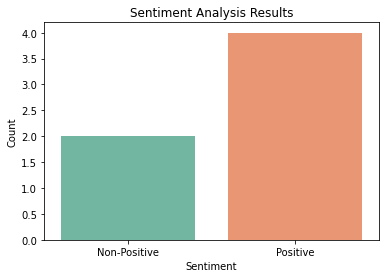

In [10]:
#Visualisation1
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = filtered_data['sentiment'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.xticks(ticks=[0, 1], labels=['Non-Positive', 'Positive'])
plt.show()

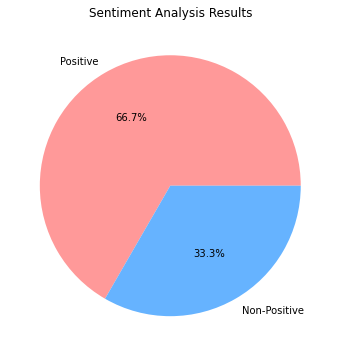

In [13]:
#Visualisation 2
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=['Positive', 'Non-Positive'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sentiment Analysis Results')
plt.show()